In [3]:
import pandas as pd

data=pd.read_csv('Housing.csv')
print(data.shape)

data.isnull().sum()
data.info()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Lasso
Mean Squared Error: 1754318818534.6663
R^2 Score: 0.27264407961423853
Lasso Coefficients: [ 519552.3943331    57349.52882951  521879.00065531  349251.39167729
  192005.9226758   128498.59228375   88768.63073686  187067.74707677
  149862.60110224  365157.36911652  266656.29821761  -62837.10637239
 -192015.73875773]


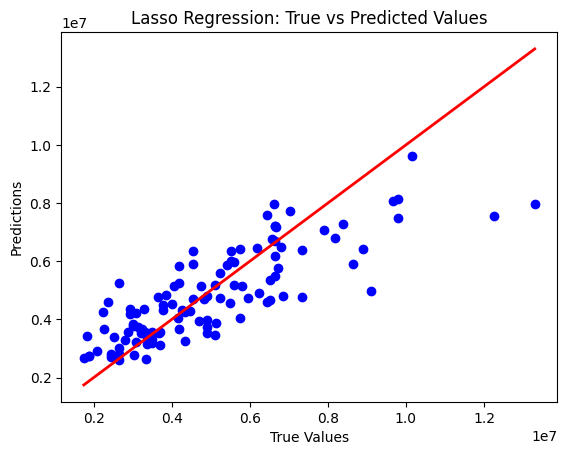

Ridge
Mean Squared Error: 1754370165878.6765
R^2 Score: 0.27243266969693625
Ridge Coefficients: [ 519447.56201889   57435.43721119  521780.01698508  349176.32566359
  192021.84783243  128527.72626266   88805.5206495   187015.11330365
  149826.12245211  365121.54023738  266611.99675621  -62800.36151306
 -191979.63913753]


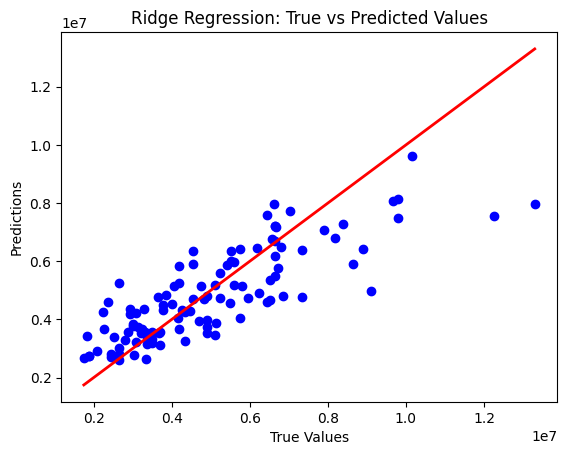

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


Y=data['price']
X=data.drop(columns='price')

X=pd.get_dummies(X,drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

L=Lasso(alpha=0.1)
R=Ridge(alpha=0.1)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

L.fit(X_train,y_train)
y_predict=L.predict(X_test)
lr2=r2_score(y_predict,y_test)
lmse=mean_squared_error(y_predict,y_test)
print("Lasso")
print(f"Mean Squared Error: {lmse}")
print(f"R^2 Score: {lr2}")
print("Lasso Coefficients:", L.coef_)

# Plotting the true vs. predicted values
plt.scatter(y_test, y_predict, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Lasso Regression: True vs Predicted Values")
plt.show()


R.fit(X_train,y_train)
y_predict=R.predict(X_test)
rr2=r2_score(y_predict,y_test)
rmse=mean_squared_error(y_predict,y_test)
print("Ridge")
print(f"Mean Squared Error: {rmse}")
print(f"R^2 Score: {rr2}")
print("Ridge Coefficients:", R.coef_)

# Plotting the true vs. predicted values
plt.scatter(y_test, y_predict, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Ridge Regression: True vs Predicted Values")
plt.show()








In [6]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define a range of alpha values to test
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

# Lasso Regression with GridSearchCV
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, alpha_values, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for MSE
grid_lasso.fit(X_train, y_train)
best_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Ridge Regression with GridSearchCV
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, alpha_values, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for MSE
grid_ridge.fit(X_train, y_train)
best_alpha_ridge = grid_ridge.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")


Best alpha for Lasso: 1000
Best alpha for Ridge: 10


In [7]:
# Retrain with optimal alpha for Lasso
L = Lasso(alpha=best_alpha_lasso)
L.fit(X_train, y_train)
y_predict_lasso = L.predict(X_test)
print("Lasso with optimal alpha")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict_lasso)}")
print(f"R^2 Score: {r2_score(y_test, y_predict_lasso)}")

# Retrain with optimal alpha for Ridge
R = Ridge(alpha=best_alpha_ridge)
R.fit(X_train, y_train)
y_predict_ridge = R.predict(X_test)
print("Ridge with optimal alpha")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict_ridge)}")
print(f"R^2 Score: {r2_score(y_test, y_predict_ridge)}")


Lasso with optimal alpha
Mean Squared Error: 1755636065589.1462
R^2 Score: 0.6526636331044082
Ridge with optimal alpha
Mean Squared Error: 1760077525667.3752
R^2 Score: 0.6517849312837286


# Methods to Detect Multicollinearity
There are several methods to identify multicollinearity in a dataset:

## Correlation Matrix
A simple way to detect multicollinearity is to calculate the correlation matrix for the predictor variables.
High correlations (close to +1 or -1) between pairs of features suggest multicollinearity.
python
Copy code


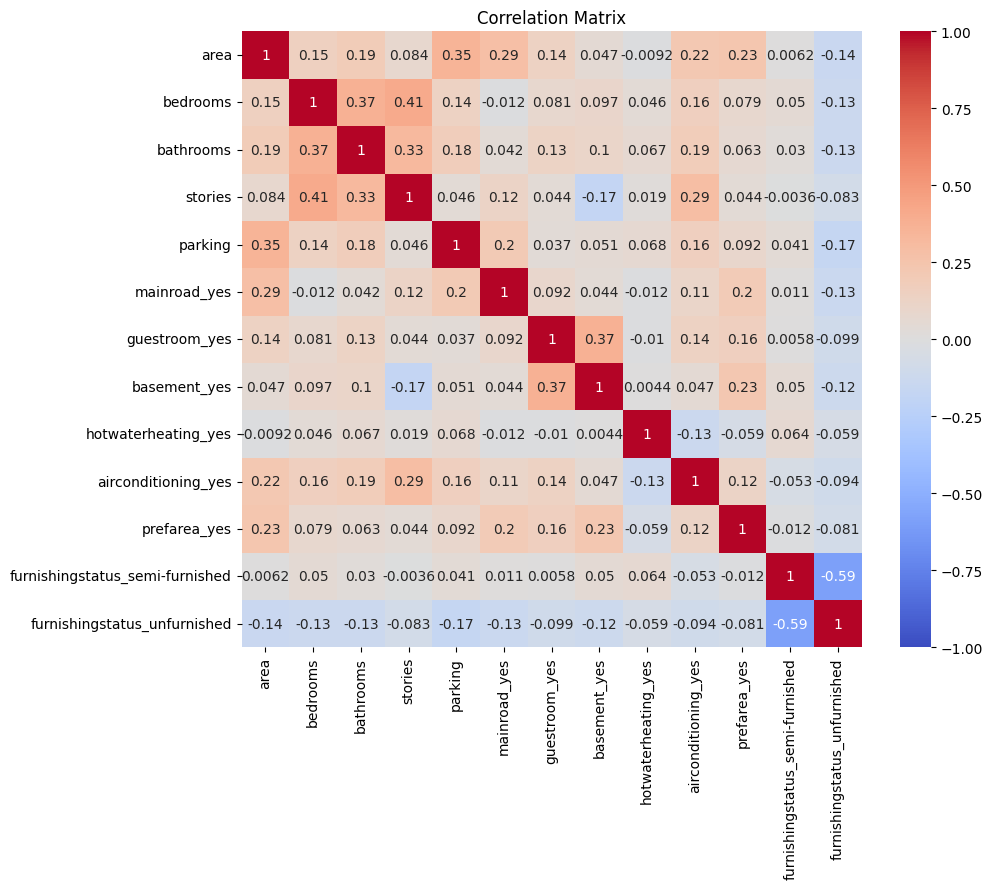

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X is a DataFrame containing predictor variables
corr_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


# Condition Number

 
The condition number, derived from the eigenvalues of the feature matrix, indicates multicollinearity.
A condition number above 30 suggests strong multicollinearity.
The condition number provides insight into the multicollinearity of your dataset:

Condition Number < 30: Low multicollinearity (no immediate concern).
Condition Number > 30: High multicollinearity, potential for issues in model stability.
Condition Number > 100: Severe multicollinearity, which can cause instability in regression coefficients.

In [9]:
import numpy as np

# Calculating the condition number
condition_number = np.linalg.cond(X_train)
print("Condition Number:", condition_number)


Condition Number: 2.637391478261602


# Reducing Multicollinearity
## If multicollinearity is detected, consider the following options to address it:

Remove Highly Correlated Predictors: Drop one of each pair of highly correlated features.
Combine Predictors: Use dimensionality reduction techniques, like Principal Component Analysis (PCA), to create uncorrelated features.
Regularization: Use techniques like Ridge Regression or Lasso Regression, which can handle multicollinearity by penalizing large coefficients.

# Polynomial Regression 

## Polynomial Regression essentially projects the input feature space into a higher-dimensional space by adding polynomial terms. The reason this helps with non-linear data is that higher-degree terms introduce curvature into the model, allowing it to better approximate non-linear patterns.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

model = LinearRegression()
model.fit(X_poly, y_train)
y_predict_linear = model.predict(X_test)
print("Ridge with optimal alpha")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_predict_linear)}")
print(f"R^2 Score: {r2_score(y_test, y_predict_linear)}")


ValueError: X has 13 features, but LinearRegression is expecting 105 features as input.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])

# Transform to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("Coefficients:", model.coef_)


Mean Squared Error: 1.5146129380243426e-29
Coefficients: [ 0.00000000e+00 -8.77076189e-15  1.00000000e+00]


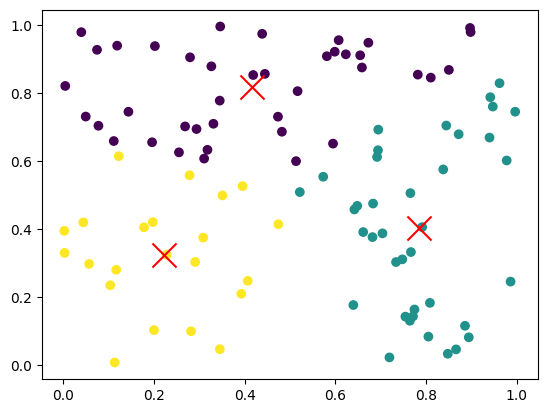

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data
X = np.random.rand(100, 2)

# Train K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.show()


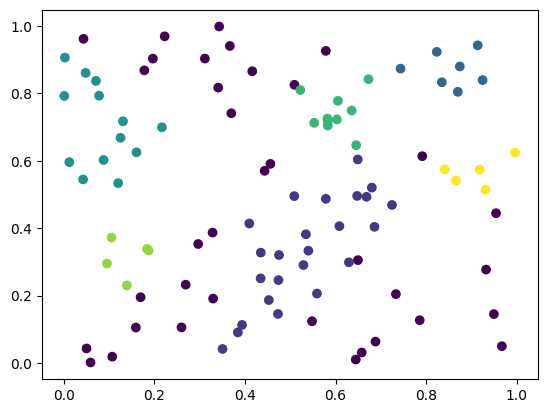

In [4]:
from sklearn.cluster import DBSCAN

# Sample data
X = np.random.rand(100, 2)

# Train DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()
